---
UUM504E - Structural Dynamics - Homework - 1
2022 - 2023 Spring Term
Author: Dilan Kilic (kilicd15@itu.edu.tr)
Student ID: 511211159
---

In [94]:
# import libraries
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')

import warnings
warnings.filterwarnings('ignore')

# Question - 1

In [95]:
# Given

m1 = 1000   # mass, kg
m2 = 1200   # mass, kg
k = 480000  # spring stiffness, N/m

x_max = 10  # deflection, cm

In [96]:
# calculate the frequencies (wn1 and wn2)

wn1 = math.sqrt(k/m1)   # rad/s
wn2 = math.sqrt(k/m2)   # rad/s

delta_w = wn2-wn1
delta_f = abs(delta_w / (2*math.pi))

print('The frequency of m1 mass: %5.6f rad/s' % (wn1))
print('The frequency of m2 mass: %5.6f rad/s' % (wn2))
print('The change in frequency (rad/s): %5.6f rad/s' % (delta_w))
print('The change in frequency (Hz): %12.6f Hz'% (delta_f))

The frequency of m1 mass: 21.908902 rad/s
The frequency of m2 mass: 20.000000 rad/s
The change in frequency (rad/s): -1.908902 rad/s
The change in frequency (Hz):     0.303811 Hz


In [97]:
# calculate velocity and acceleration amplitudes (v1,v2 and a1,a2)

# velocity amplitude
v1 = x_max*wn1
v2 = x_max*wn2
# acceleration amplitude
a1 = x_max*wn1**2
a2 = x_max*wn2**2

print('v1: %.6f v2: %.6f cm/s' % (v1,v2))
print('The change in velocity amplitude: %14.6f cm/s or %.6f m/s' % ((v2-v1), (v2-v1)*0.01))
print('a1: %.6f a2: %.6f cm/s2' % (a1,a2))
print('The change in acceleration amplitude: %1.6f cm/s2 or %.6f m/s2' % ((a2-a1), (a2-a1)*0.01))

v1: 219.089023 v2: 200.000000 cm/s
The change in velocity amplitude:     -19.089023 cm/s or -0.190890 m/s
a1: 4800.000000 a2: 4000.000000 cm/s2
The change in acceleration amplitude: -800.000000 cm/s2 or -8.000000 m/s2


# Question - 2

In [98]:
# Given
m = 180     # mass,kg
k = 1800    # stiffness, N/m
c = 250     # damping coefficient, kg/s

x0 = -6 / 1000  # initial displacement, m
v0 = 12 / 1000  # initial velocity, m/s

The frequency in (rad/s): 3.162278 rad/s
The damping value: 0.219603
Note: The system is underdamped and will oscillate since the damping value is less than 1.
The damped natural frequency (wd): 3.085085 rad/s
The constant term A: 0.006515 and phi: -1.170466


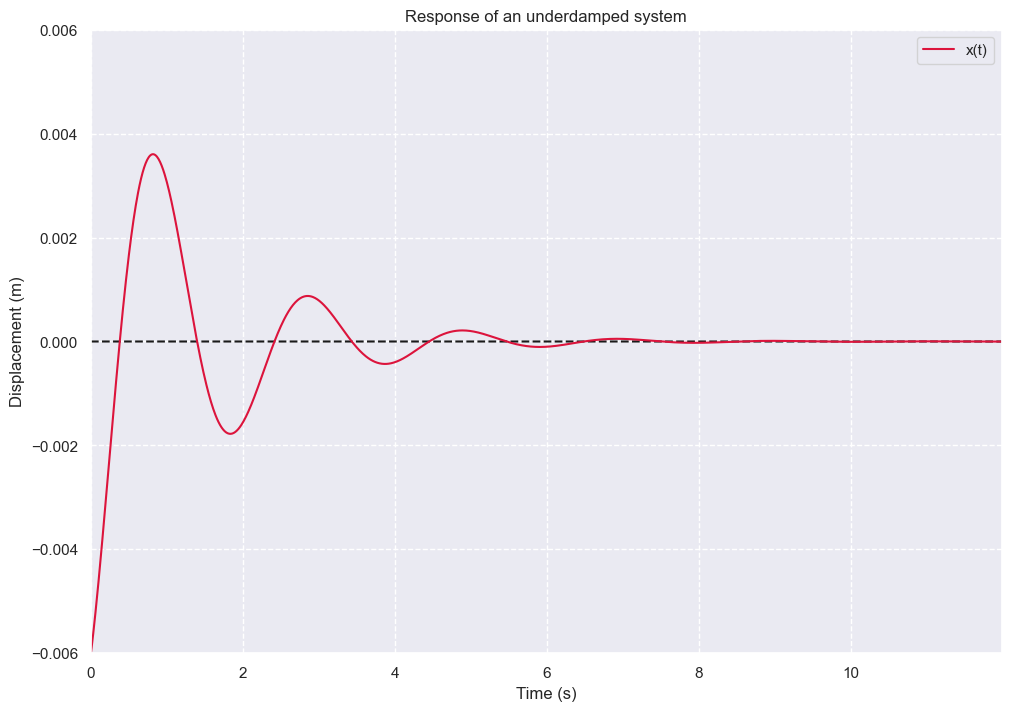

In [99]:
wn = math.sqrt(k/m)  # rad/s
damping = c/(2*math.sqrt(k*m))

wd = wn*math.sqrt(1-damping**2)

A = math.sqrt(((v0+damping*wn*x0)**2+(x0*wd)**2)/(wd**2))

deg = math.atan((x0*wd)/(v0+damping*wn*x0))

print('The frequency in (rad/s): %.6f rad/s' % (wn))
print('The damping value: %.6f' % (damping))
if damping < 1:
    print('Note: The system is underdamped and will oscillate since the damping value is less than 1.')
    print('The damped natural frequency (wd): %.6f rad/s' % (wd))


print('The constant term A: %.6f and phi: %.6f' % (A,deg))

# plot
t = np.arange(0,12,0.01)
x_t = np.zeros_like(t)
line = np.zeros_like(t)
fig, ax = plt.subplots(1,1, figsize=(10,7), constrained_layout=True, dpi=100)

for i in range(len(t)):
    x_t[i] = A*math.sin(wd*t[i]+deg)*math.exp(-damping*wn*t[i])
    line[i] = 0*t[i]

plt.plot(t,line,'k--')
plt.plot(t,x_t,label='x(t)',c='crimson')
plt.xlim((t.min(),t.max()))
plt.ylim((x_t.min(),-x_t.min()))
plt.legend()
plt.grid(True, which="both", ls='--')
plt.xlabel('Time (s)')
plt.ylabel('Displacement (m)')
plt.title('Response of an underdamped system')
plt.show();

# Question - 5

The natural frequency: 289.581796 rad/s
The damped frequency: 289.567316 rad/s
The magnitude of the response: 0.001225 m
The phase of the response: -0.133193 rad/s
The phase of the transient: -1.437231 rad/s
The amplitude of the transient: 0.001225


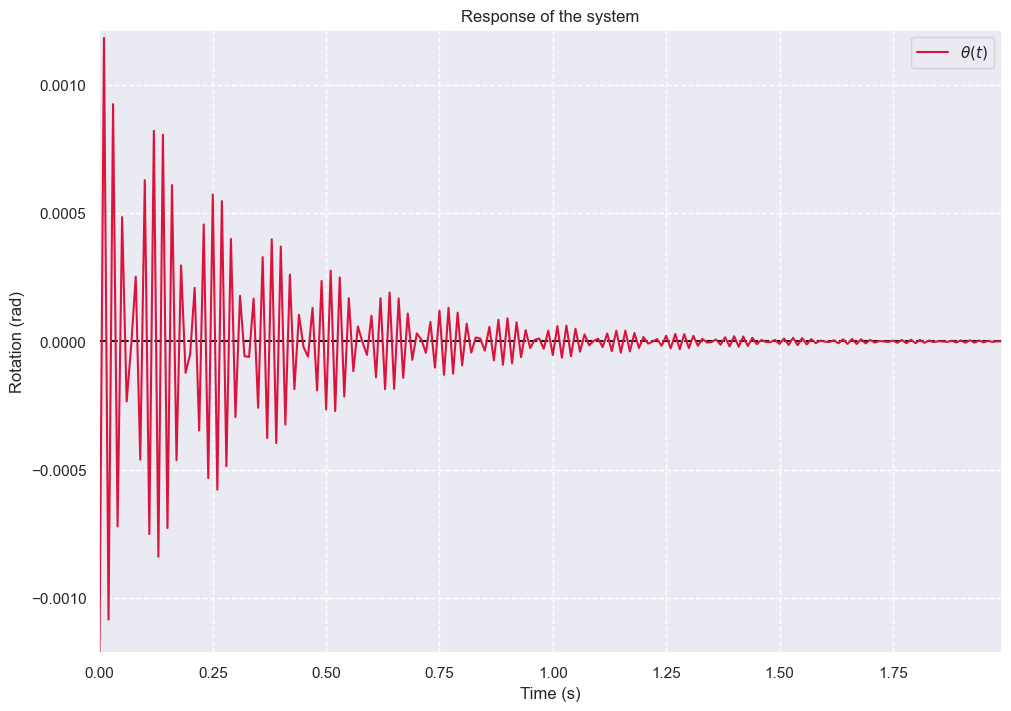

In [100]:
# Given parameters
G_shaft = (8.2 * 10**10)    # modulus of rigidity
J = 0.6                     # moment of inertia
L = 1                       # shaft length, m
d = 0.05                    # shaft diameter, m
damping = 0.01              # damping term

a = (math.pi*d**2)/4        # shaft area
rho = 8000                  # steel density, kg/m3

# calculate the polar moment of inertia
Jp = (math.pi*d**4)/32

# torsional stiffness (N-m)
kt = G_shaft * Jp / L

# calculate the natural (wn) and damped (wd) frequencies
wn = math.sqrt(kt/J)    
wd = wn*math.sqrt(1-damping**2)

print('The natural frequency: %.6f rad/s' % wn)
print('The damped frequency: %.6f rad/s' % wd)

# calculate the magnitude and the phase of the steady state response
f0 = 16.67  # from equation of motion, mass-normalized force
w = 312     # from equation of motion, driving frequency (rad/s)

X = (f0)/(math.sqrt((wn**2-w**2)**2+(2*damping*wn*w)**2))
theta = math.atan((2*damping*wn*w)/(wn**2-w**2))

print('The magnitude of the response: %.6f m' % X)
print('The phase of the response: %.6f rad/s' % theta)

x0=0; v0=0  # zero initial conditions

# the phase of the transient
phi = math.atan((wd*(x0-X*math.cos(theta)))/(v0+(x0-X*math.cos(theta))*damping*wn-w*X*math.sin(theta)))

# the amplitude of the transient
A = (x0-X*math.cos(theta))/(math.sin(phi))

print('The phase of the transient: %.6f rad/s' % phi)
print('The amplitude of the transient: %.6f' % A)

# the total response (theta_t)
# plot
t = np.arange(0,2,0.01)
theta_t = np.zeros_like(t)
line = np.zeros_like(t)
fig, ax = plt.subplots(1,1, figsize=(10,7), constrained_layout=True, dpi=100)

for i in range(len(t)):
    theta_t[i] = A*math.exp(-damping*wn*t[i])*math.sin(wd*t[i]+phi)
    line[i] = 0*t[i]

plt.plot(t,line,'k--')
plt.plot(t,theta_t,label=r'$\theta (t)$',c='crimson')
plt.xlim((t.min(),t.max()))
plt.ylim((theta_t.min(),-theta_t.min()))
plt.legend()
plt.grid(True, which="both", ls='--')
plt.xlabel('Time (s)')
plt.ylabel('Rotation (rad)')
plt.title('Response of the system')
plt.show();
